<a href="https://colab.research.google.com/github/Hero0963/kaggle/blob/main/kaggle_binary_classification_of_machine_failures/machine_failures_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle competitions download -c playground-series-s3e17

 57% 2.00M/3.49M [00:00<00:00, 2.56MB/s]
100% 3.49M/3.49M [00:01<00:00, 3.53MB/s]


In [ ]:
import zipfile
import pandas as pd

# 解壓縮zip檔案
with zipfile.ZipFile('/content/playground-series-s3e17.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_folder')


In [ ]:
df_train = pd.read_csv('/content/extracted_folder/train.csv')

In [ ]:
df_test = pd.read_csv('/content/extracted_folder/test.csv')

In [ ]:
df_all = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
features = df_all.drop('Machine failure', axis=1)
label = df_all['Machine failure']

# More EDA

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd


# # 計算每個類別的數量
# type_counts = df_train['Type'].value_counts()

# # 計算每個類別與機器故障之間的關係
# failure_by_type = df_train.groupby('Type')['Machine failure'].mean()

# # 繪製柱狀圖顯示不同類別的數量
# plt.bar(type_counts.index, type_counts.values)
# plt.xlabel('Type')
# plt.ylabel('Count')
# plt.title('Distribution of Types')
# plt.show()

# # 繪製折線圖顯示不同類別的機器故障率
# plt.plot(failure_by_type.index, failure_by_type.values, marker='o')
# plt.xlabel('Type')
# plt.ylabel('Machine failure Rate')
# plt.title('Machine failure Rate by Type')
# plt.show()

In [ ]:
# df = df_train.copy()

# import matplotlib.pyplot as plt

# for column in df.columns:
#     if df[column].dtype == 'object':
#         plt.figure()
#         df[column].value_counts().plot(kind='bar')
#         plt.title(f'Distribution of {column}')
#         plt.xlabel(column)
#         plt.ylabel('Count')
#         plt.show()
#     else:
#         plt.figure()
#         df[column].plot(kind='hist', bins=30, edgecolor='black')
#         plt.title(f'Distribution of {column}')
#         plt.xlabel(column)
#         plt.ylabel('Frequency')
#         plt.show()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
default method='pearson'

In [ ]:
# import seaborn as sns
# import pandas as pd

# # 將object類型的欄位轉換為類別編碼或獨熱編碼
# df_encoded = pd.get_dummies(df, columns=[col for col in df.columns if df[col].dtype == 'object'])

# # 計算相關係數矩陣
# correlation_matrix = df_encoded.corr()

# # 繪製相關係數熱圖
# fig, ax = plt.subplots(figsize=(16, 10))
# sns.heatmap(correlation_matrix, annot=True, linewidths=1)
# plt.show()

In [ ]:
df = df_all.copy()

In [ ]:
# 將object類型的欄位轉換為類別編碼或獨熱編碼
df_encoded = pd.get_dummies(df, columns=[col for col in df.columns if df[col].dtype == 'object'])

In [ ]:
df_encoded.head(10)

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,...,Product ID_M24846,Product ID_M24847,Product ID_M24849,Product ID_M24851,Product ID_M24855,Product ID_M24857,Product ID_M24859,Type_H,Type_L,Type_M
0,0,300.6,309.6,1596,36.1,140,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,302.6,312.1,1759,29.1,200,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,299.3,308.5,1805,26.5,25,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,301.0,310.9,1524,44.3,197,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,298.0,309.0,1641,35.4,34,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,5,298.4,308.9,1429,42.1,65,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,6,299.6,311.0,1413,42.9,156,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,7,298.7,310.1,1609,38.1,67,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,8,297.7,308.8,1578,35.2,13,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,9,300.5,312.3,1447,53.3,98,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


ref = https://www.kaggle.com/code/yantxx/xgboost-binary-classifier-machine-failure

#Features Used  
### Temperatures  
Difference in Temperature: Air temperature - Process temperature  
Temperature Ratio: Process temperature / Air temperature  
Tool Process Temperature: Process temperature * Tool Wear  

### Power  
Rotation to Power: Rotation ~ Torque interaction  
Torque to Power: Torque ~ Rotation interaction  

### Categorical  
Type: Label Encoded  
Product ID: Transform to numeric

In [ ]:
import numpy as np


df['air_process_diff'] = abs(df['Air temperature [K]'] - df['Process temperature [K]'])
df['speed_power'] = df['Rotational speed [rpm]'] * (2 * np.pi / 60) / (df['Rotational speed [rpm]'] * (2 * np.pi / 60) * df['Torque [Nm]'])
df['torque_power'] = df['Torque [Nm]'] / (df['Rotational speed [rpm]'] * (2 * np.pi / 60) * df['Torque [Nm]'])
df["tool_process"] = df["Tool wear [min]"] * df["Process temperature [K]"]
df["temp_ratio"] = df["Process temperature [K]"] / df["Air temperature [K]"]
df["product_id_num"] = pd.to_numeric(df["Product ID"].str.slice(start=1))

# Type Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 創建 LabelEncoder 物件
label_encoder = LabelEncoder()

# 將 Type 欄位進行標籤編碼
df['Type_LabelEncoded'] = label_encoder.fit_transform(df['Type'])

#rename columns

In [ ]:
import re


df.columns = [re.sub(r"[^a-zA-Z0-9_]+", "_", col) for col in df.columns]

In [ ]:
df.head(10)

,id,Product_ID,Type,Air_temperature_K_,Process_temperature_K_,Rotational_speed_rpm_,Torque_Nm_,Tool_wear_min_,Machine_failure,TWF,...,PWF,OSF,RNF,air_process_diff,speed_power,torque_power,tool_process,temp_ratio,product_id_num,Type_LabelEncoded
0,0,L50096,L,300.6,309.6,1596,36.1,140,0.0,0,...,0,0,0,9.0,0.027701,0.005983,43344.0,1.029940,50096,1
1,1,M20343,M,302.6,312.1,1759,29.1,200,0.0,0,...,0,0,0,9.5,0.034364,0.005429,62420.0,1.031395,20343,2
2,2,L49454,L,299.3,308.5,1805,26.5,25,0.0,0,...,0,0,0,9.2,0.037736,0.005290,7712.5,1.030738,49454,1
3,3,L53355,L,301.0,310.9,1524,44.3,197,0.0,0,...,0,0,0,9.9,0.022573,0.006266,61247.3,1.032890,53355,1
4,4,M24050,M,298.0,309.0,1641,35.4,34,0.0,0,...,0,0,0,11.0,0.028249,0.005819,10506.0,1.036913,24050,2
5,5,M24300,M,298.4,308.9,1429,42.1,65,0.0,0,...,0,0,0,10.5,0.023753,0.006683,20078.5,1.035188,24300,2
6,6,L56736,L,299.6,311.0,1413,42.9,156,0.0,0,...,0,0,0,11.4,0.023310,0.006758,48516.0,1.038051,56736,1
7,7,L55488,L,298.7,310.1,1609,38.1,67,0.0,0,...,0,0,0,11.4,0.026247,0.005935,20776.7,1.038165,55488,1
8,8,L56397,L,297.7,308.8,1578,35.2,13,0.0,0,...,0,0,0,11.1,0.028409,0.006052,4014.4,1.037286,56397,1
9,9,L55067,L,300.5,312.3,1447,53.3,98,0.0,0,...,0,0,0,11.8,0.018762,0.006599,30605.4,1.039268,55067,1


In [ ]:
df_train_data = df[df['Machine_failure'].notnull()]
df_test_data = df[df['Machine_failure'].isnull()]

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve

In [ ]:
X = df_train_data.drop("Machine_failure", axis=1)
y = df_train_data["Machine_failure"]

In [ ]:
X.head(10)

,id,Product_ID,Type,Air_temperature_K_,Process_temperature_K_,Rotational_speed_rpm_,Torque_Nm_,Tool_wear_min_,TWF,HDF,PWF,OSF,RNF,air_process_diff,speed_power,torque_power,tool_process,temp_ratio,product_id_num,Type_LabelEncoded
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,9.0,0.027701,0.005983,43344.0,1.029940,50096,1
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,9.5,0.034364,0.005429,62420.0,1.031395,20343,2
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,9.2,0.037736,0.005290,7712.5,1.030738,49454,1
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,9.9,0.022573,0.006266,61247.3,1.032890,53355,1
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,11.0,0.028249,0.005819,10506.0,1.036913,24050,2
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,10.5,0.023753,0.006683,20078.5,1.035188,24300,2
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,11.4,0.023310,0.006758,48516.0,1.038051,56736,1
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,11.4,0.026247,0.005935,20776.7,1.038165,55488,1
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,11.1,0.028409,0.006052,4014.4,1.037286,56397,1
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,11.8,0.018762,0.006599,30605.4,1.039268,55067,1


In [ ]:
selected_features = ['Air_temperature_K_', 'Process_temperature_K_', 'Rotational_speed_rpm_', 'Torque_Nm_', 'Tool_wear_min_',
            'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'air_process_diff', 'speed_power', 'torque_power', 'tool_process',
            'temp_ratio', 'product_id_num', 'Type_LabelEncoded']

label = ["Machine_failure"]

In [ ]:
uesd_columns = selected_features + label

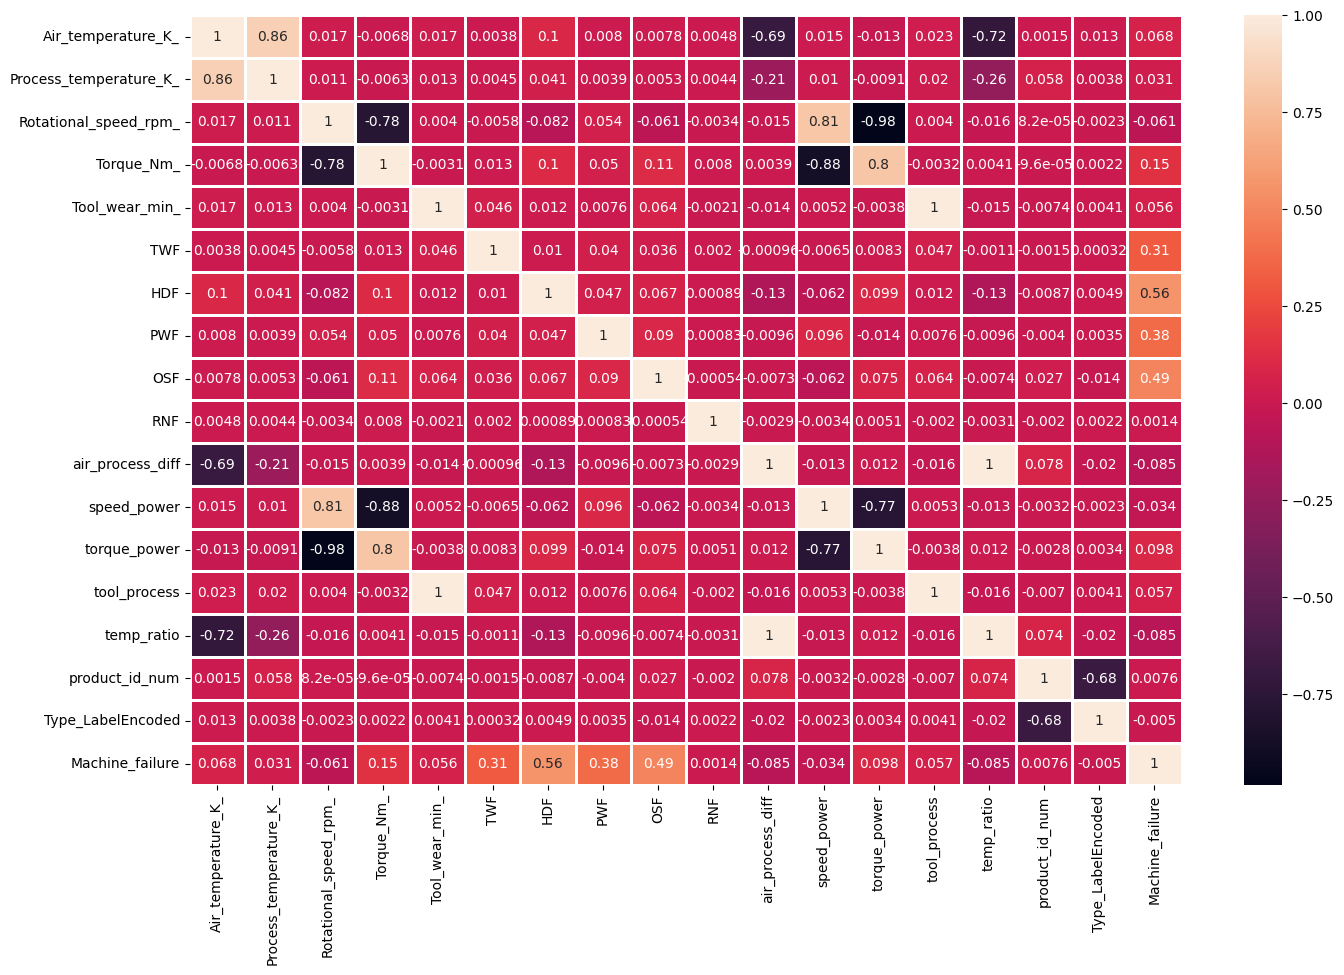

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# # 將object類型的欄位轉換為類別編碼或獨熱編碼
# df_encoded = pd.get_dummies(df, columns=[col for col in df.columns if df[col].dtype == 'object'])

df_check = df_train_data[uesd_columns]

# 計算相關係數矩陣
correlation_matrix = df_check.corr()

# 繪製相關係數熱圖
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=1)
plt.show()

In [ ]:
correlations = df_check.corr()['Machine_failure'].abs().sort_values(ascending=False)
display(correlations)

Machine_failure           1.000000
HDF                       0.564507
OSF                       0.494668
PWF                       0.383941
TWF                       0.311919
Torque_Nm_                0.145793
torque_power              0.097606
temp_ratio                0.084591
air_process_diff          0.084536
Air_temperature_K_        0.067744
Rotational_speed_rpm_     0.060868
tool_process              0.056679
Tool_wear_min_            0.056448
speed_power               0.033680
Process_temperature_K_    0.030966
product_id_num            0.007609
Type_LabelEncoded         0.005049
RNF                       0.001428
Name: Machine_failure, dtype: float64

In [ ]:
display(type(correlations))

pandas.core.series.Series

In [ ]:
column_names = correlations.index.tolist()
display(column_names)

['Machine_failure',
 'HDF',
 'OSF',
 'PWF',
 'TWF',
 'Torque_Nm_',
 'torque_power',
 'temp_ratio',
 'air_process_diff',
 'Air_temperature_K_',
 'Rotational_speed_rpm_',
 'tool_process',
 'Tool_wear_min_',
 'speed_power',
 'Process_temperature_K_',
 'product_id_num',
 'Type_LabelEncoded',
 'RNF']

In [ ]:
selected_features = column_names[1:]
selected_features.pop()
selected_features.pop()
selected_features.pop()
display(selected_features)

['HDF',
 'OSF',
 'PWF',
 'TWF',
 'Torque_Nm_',
 'torque_power',
 'temp_ratio',
 'air_process_diff',
 'Air_temperature_K_',
 'Rotational_speed_rpm_',
 'tool_process',
 'Tool_wear_min_',
 'speed_power',
 'Process_temperature_K_']

In [ ]:
Xs = df_train_data[selected_features]
y = df_train_data['Machine_failure']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(Xs, y, train_size = 0.8, random_state=42)

#apply XGB Model

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# # 比較預測結果和實際值的準確度
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)
# ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

# 計算 ROC AUC 分數
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9554819181619779


In [ ]:
test_X = df_test_data[selected_features]

In [ ]:
predicted_labels = xgb.predict_proba(test_X)[:, 1]

In [ ]:
submission = pd.DataFrame({'id': df_test['id'], 'Machine failure': predicted_labels})
submission['Machine failure'] = submission['Machine failure'].astype(float) # convert_data_type_important
submission.to_csv('kaggle_bi_classification.csv', index=False)

# rf

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score

# # 比較預測結果和實際值的準確度
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# 計算 ROC AUC 分數
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9514113531411063


In [ ]:
test_X = df_test_data[selected_features]
predicted_labels = rf.predict_proba(test_X)[:, 1]
submission = pd.DataFrame({'id': df_test['id'], 'Machine failure': predicted_labels})
submission['Machine failure'] = submission['Machine failure'].astype(float) # convert_data_type_important
submission.to_csv('rf.csv', index=False)